# **Assignment 2 - Advanced Exploratory Data Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sabyasachiseal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/sabyasachiseal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## **Importing Dataset**

In [10]:
file_path = "./tripadvisor_hotel_reviews.csv"
review_file = pd.read_csv(file_path)
review_file.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


## Task 1:
Try to display first and last 5 values in the dataset

In [11]:
review_file.head(5)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [12]:
review_file.tail(5)

,Review,Rating
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1
20490,"people talking, ca n't believe excellent ratin...",2


## Task 2:
Transform the 'Rating' column to nominal data type with binary labels

In [16]:
review_file['Rating'] = review_file['Rating'].astype(str)
review_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  object
dtypes: object(2)
memory usage: 320.3+ KB


## Task 3:
Name labels 'positive' for rating value > 3 and 'negative' for <= 3

In [17]:
def score_label(score):
    return "Positive" if int(score) > 3 else "Negative"
    
hotelReview['Pos/Neg'] = hotelReview['Rating'].apply(score_label)

review_file.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


## Task 4: 
Calculate the lengths of each record in 'review' column and add to the dataframe

In [ ]:
def text_length(text):
  return len(text)
review_file['Review_Length'] = review_file['Review'].apply(text_length)

In [18]:
review_file.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


### **5. Calculate the number of words in 'review' column and add to the dataframe**

In [19]:
def word_num(text):
  return len(text.split(' '))
review_file['Review_no_words_length'] = review_file['Review'].apply(word_num)

In [20]:
review_file.head()

,Review,Rating,Review_no_words_length
0,nice hotel expensive parking got good deal sta...,4,89
1,ok nothing special charge diamond member hilto...,2,252
2,nice rooms not 4* experience hotel monaco seat...,3,219
3,"unique, great stay, wonderful time hotel monac...",5,91
4,"great stay great stay, went seahawk game aweso...",5,193


### **6. Calculate the average length of word for each record in 'review' column and add to the dataframe**

In [21]:
def avg_length(text):
  n = 0
  sum = 0
  for word in text.split(" "):
    sum += len(word)
    n += 1
  return sum/n
review_file['Review_average_word_length'] = review_file['Review'].apply(avg_length)

In [22]:
review_file.head()

,Review,Rating,Review_no_words_length,Review_average_word_length
0,nice hotel expensive parking got good deal sta...,4,89,5.674157
1,ok nothing special charge diamond member hilto...,2,252,5.706349
2,nice rooms not 4* experience hotel monaco seat...,3,219,5.520548
3,"unique, great stay, wonderful time hotel monac...",5,91,5.604396
4,"great stay great stay, went seahawk game aweso...",5,193,5.642487


### **7. Calculate the average sentence length of the sentences in the 'review' and add to the dataframe**

In [23]:
def sentence_length(text):
  n = 0
  sum = 0
  for word in text.split("."):
    sum += len(word)
    n += 1
  return sum/n
review_file['Review_average_sentence_length'] = review_file['Review'].apply(sentence_length)

In [24]:
review_file.head()

,Review,Rating,Review_no_words_length,Review_average_word_length,Review_average_sentence_length
0,nice hotel expensive parking got good deal sta...,4,89,5.674157,593.0
1,ok nothing special charge diamond member hilto...,2,252,5.706349,337.0
2,nice rooms not 4* experience hotel monaco seat...,3,219,5.520548,177.5
3,"unique, great stay, wonderful time hotel monac...",5,91,5.604396,600.0
4,"great stay great stay, went seahawk game aweso...",5,193,5.642487,640.0


### **8. Visualise each of the columns with respect to the 'Rating' column**

In [25]:
review_fileGroupedByRating = review_file.groupby('Rating').mean()
review_fileGroupedByRating.head()

/tmp/ipykernel_66788/628827592.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  review_fileGroupedByRating = review_file.groupby('Rating').mean()


,Review_no_words_length,Review_average_word_length,Review_average_sentence_length
Rating,,,
1,114.365236,5.667246,337.517081
2,128.598438,5.703824,342.688421
3,116.705586,5.686740,305.230812
4,109.771154,5.785745,311.456222
5,95.962889,5.897202,319.151437


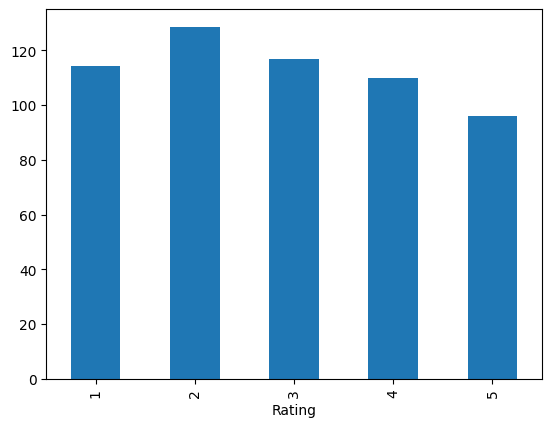

In [27]:
review_fileGroupedByRating['Review_no_words_length'].plot(kind='bar')
plt.show()

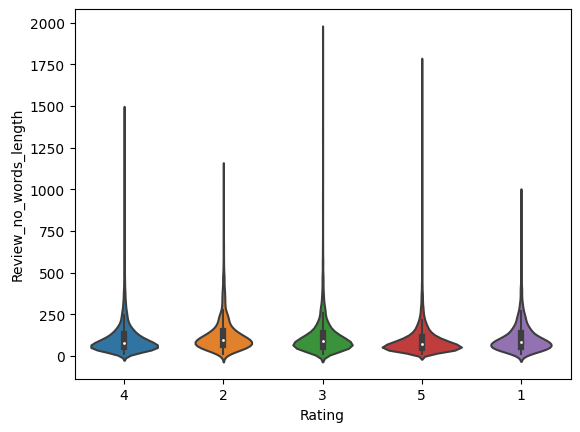

In [28]:
sns.violinplot(x='Rating', y='Review_no_words_length', data=review_file)
plt.show()

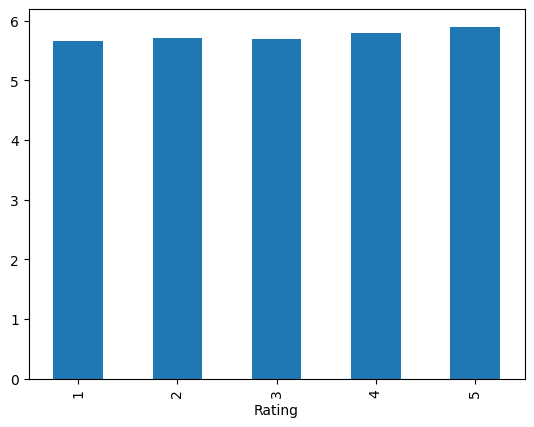

In [29]:
review_fileGroupedByRating['Review_average_word_length'].plot(kind='bar')
plt.show()

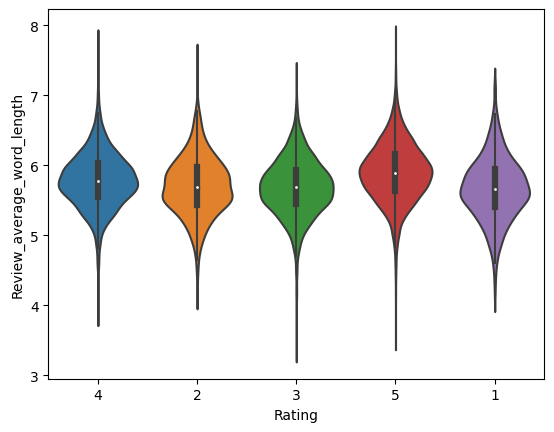

In [30]:
sns.violinplot(x='Rating', y='Review_average_word_length', data=review_file)
plt.show()

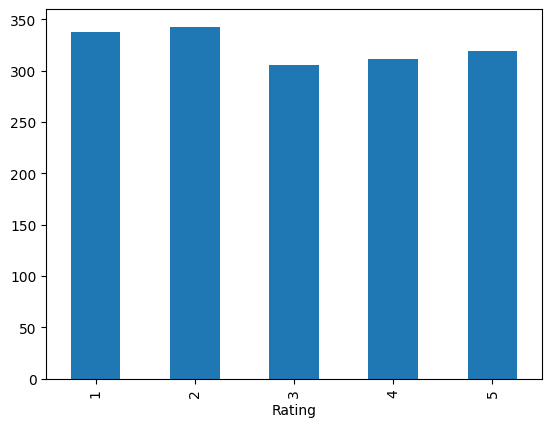

In [31]:
review_fileGroupedByRating['Review_average_sentence_length'].plot(kind='bar')
plt.show()

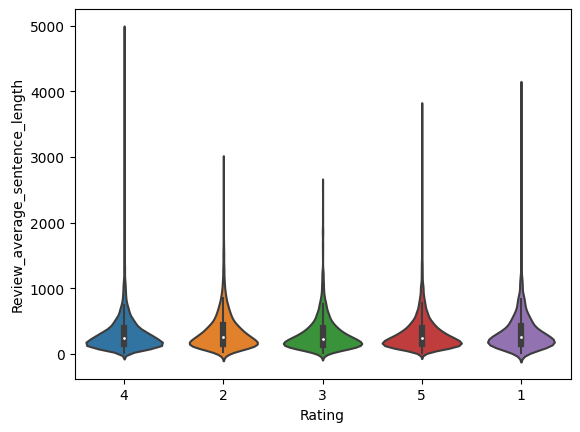

In [32]:
sns.violinplot(x='Rating', y='Review_average_sentence_length', data=review_file)
plt.show()

In [33]:
ratingStats = review_file['Rating'].value_counts()
print(ratingStats)

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64


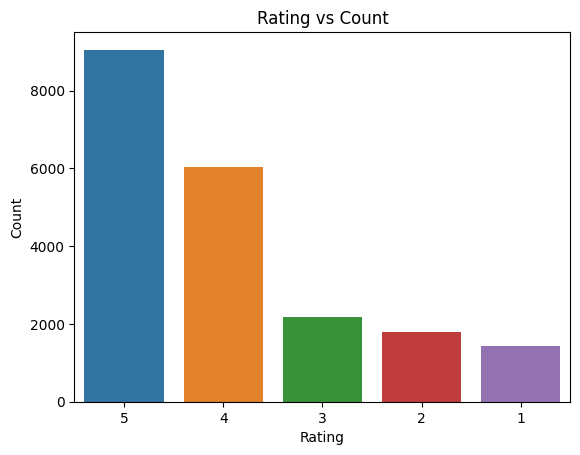

In [34]:
sns.barplot(x=ratingStats.index, y=ratingStats.values)
plt.title("Rating vs Count")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

### **9. Compute term frequency analysis on the 'review' column,**


In [35]:
review_file['Review_Editable'] = review_file['Review'].str.lower()
review_file.head(3)

,Review,Rating,Review_no_words_length,Review_average_word_length,Review_average_sentence_length,Review_Editable
0,nice hotel expensive parking got good deal sta...,4,89,5.674157,593.0,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,252,5.706349,337.0,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,219,5.520548,177.5,nice rooms not 4* experience hotel monaco seat...


In [36]:
review_file['Review_Editable'] = review_file['Review_Editable'].str.replace('[{}]'.format(string.punctuation), '', regex=True)
review_file.head(3)

,Review,Rating,Review_no_words_length,Review_average_word_length,Review_average_sentence_length,Review_Editable
0,nice hotel expensive parking got good deal sta...,4,89,5.674157,593.0,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,252,5.706349,337.0,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,219,5.520548,177.5,nice rooms not 4 experience hotel monaco seatt...


In [37]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define a function to remove stopwords
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_text = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sabyasachiseal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
review_file['Review_Editable'] = review_file['Review_Editable'].apply(remove_stopwords)
review_file.head(3)

,Review,Rating,Review_no_words_length,Review_average_word_length,Review_average_sentence_length,Review_Editable
0,nice hotel expensive parking got good deal sta...,4,89,5.674157,593.0,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,252,5.706349,337.0,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,219,5.520548,177.5,nice rooms 4 experience hotel monaco seattle g...


In [40]:
review_list = review_file['Review_Editable'].values
print(review_list)

['nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed nonexistent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay 40 parking night'
 'ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle start booked suite paid extra website description suite bedroom bathroom standard hotel room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting room bathroom bedroom unlike kimpton calls suite 5 day stay offer correct fa

In [41]:
unique_word = set()
word_count = {}
for review in review_list:
  for review_word in review.split(' '):
    past_len = len(unique_word)
    unique_word.add(review_word)
    if(len(unique_word)==past_len):
      word_count[review_word]+=1
    else:
      word_count[review_word]=1

In [42]:
print(word_count)

{'nice': 12399, 'hotel': 48832, 'expensive': 1921, 'parking': 1621, 'got': 6185, 'good': 16972, 'deal': 1440, 'stay': 15153, 'anniversary': 410, 'arrived': 2833, 'late': 1569, 'evening': 1852, 'took': 2941, 'advice': 502, 'previous': 736, 'reviews': 3738, 'valet': 482, 'check': 2927, 'quick': 896, 'easy': 2137, 'little': 6242, 'disappointed': 1204, 'nonexistent': 65, 'view': 4604, 'room': 34300, 'clean': 9359, 'size': 1971, 'bed': 4848, 'comfortable': 4407, 'woke': 131, 'stiff': 27, 'neck': 30, 'high': 1694, 'pillows': 652, 'soundproof': 47, 'like': 8112, 'heard': 801, 'music': 863, 'night': 9423, 'morning': 3136, 'loud': 608, 'bangs': 4, 'doors': 660, 'opening': 170, 'closing': 105, 'hear': 984, 'people': 6758, 'talking': 302, 'hallway': 217, 'maybe': 867, 'noisy': 995, 'neighbors': 77, 'aveda': 72, 'bath': 1134, 'products': 200, 'goldfish': 16, 'touch': 664, 'taken': 807, 'advantage': 324, 'staying': 2439, 'longer': 425, 'location': 11032, 'great': 21087, 'walking': 2872, 'distance':

In [43]:
sorted_dict_descending = {k: v for k, v in sorted(word_count.items(), key=lambda item: item[1], reverse=True)}

In [44]:
print(sorted_dict_descending)

{'hotel': 48832, 'room': 34300, 'great': 21087, 'nt': 18989, 'good': 16972, 'staff': 16203, 'stay': 15153, 'nice': 12399, 'rooms': 12015, 'location': 11032, 'stayed': 10466, 'service': 9961, 'time': 9816, 'beach': 9581, 'night': 9423, 'clean': 9359, 'day': 9340, 'breakfast': 9271, 'food': 8990, 'like': 8112, 'resort': 7914, 'really': 7763, 'place': 7689, 'pool': 7167, 'people': 6758, 'friendly': 6670, 'small': 6525, 'little': 6242, 'got': 6185, 'walk': 6090, 'excellent': 6008, 'area': 5927, '2': 5689, 'best': 5675, 'helpful': 5454, 'restaurant': 5162, 'bar': 5106, 'bathroom': 4961, 'trip': 4922, 'restaurants': 4922, 'water': 4910, 'bed': 4848, 'recommend': 4848, 'beautiful': 4657, 'went': 4643, 'view': 4604, 'floor': 4572, 'comfortable': 4407, 'desk': 4398, '5': 4343, '3': 4326, 'nights': 4317, 'right': 4251, 'want': 4174, 'way': 4080, 'better': 4055, 'wonderful': 4042, 'free': 4039, 'hotels': 4026, 'make': 4020, 'city': 3920, 'away': 3919, 'bit': 3869, 'booked': 3828, 'reviews': 3738,

In [45]:
def topFromDictionary(my_dict, top=10):
  return dict(list(my_dict.items())[0:top])

In [46]:
word_freq = topFromDictionary(sorted_dict_descending,25)
print(word_freq)

{'hotel': 48832, 'room': 34300, 'great': 21087, 'nt': 18989, 'good': 16972, 'staff': 16203, 'stay': 15153, 'nice': 12399, 'rooms': 12015, 'location': 11032, 'stayed': 10466, 'service': 9961, 'time': 9816, 'beach': 9581, 'night': 9423, 'clean': 9359, 'day': 9340, 'breakfast': 9271, 'food': 8990, 'like': 8112, 'resort': 7914, 'really': 7763, 'place': 7689, 'pool': 7167, 'people': 6758}


In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Specify the absolute path to the downloaded TrueType font file
font_path = './fonts.ttf'  # Replace with the actual absolute path

# Define your word frequencies here
word_freq = {'hello': 10, 'world': 7, 'example': 5, 'python': 3, 'code': 2}

# Create WordCloud instance with the specified font
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(word_freq)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

ValueError: Only supported for TrueType fonts